<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import glob
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [2]:
import seaborn as sns
sns.set()
sns.set_style('white')
sns.set_style('ticks')
plt.style.use('../my_rcparams.mplstyle')

In [3]:
refpath = glob.glob('../../data_final/SM_freq_shift_ref_full.pkl')
ref = pickle.load(open(refpath[0],'rb'))
ref.keys()

dict_keys(['xmeas', 'ymeas', 'yerr', 'ytheo', 'kint', 'kext', 'temp', 'dkint', 'dkext', 'klabel', 'templabel', 'xlabel', 'ylabel'])

In [4]:
devpath = glob.glob('../../data_final/SM_lossrate_expfit.pkl')
dev = pickle.load(open(devpath[0],'rb'))
dev.keys()

dict_keys(['xmeas', 'ki', 'kitheo', 'ke', 'ketheo', 'dke', 'dki', 'ylabel', 'xlabel'])

In [5]:
dpi = 1000
annsz = 8
figtextsize=10

In [6]:
import matplotlib
cmap = matplotlib.cm.get_cmap('YlGn_r')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


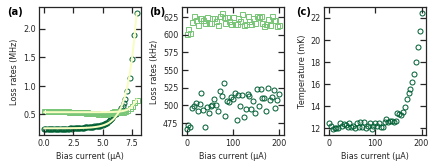

In [7]:
plt.style.use('../my_rcparams.mplstyle')

fig = plt.figure(figsize=cm2inch(17.6, 6))
gs = gridspec.GridSpec(1, 3, wspace=0.4)

axa = fig.add_subplot(gs[0, 0])
# plt.errorbar(dev['xmeas'],dev['ki']/1e3,yerr=dev['dki']/1e3,fmt='none',c=cmap(0.1),markerfacecolor='none',label=r'$\kappa_i$',lw=1)
# plt.errorbar(dev['xmeas'],dev['ke']/1e3,yerr=dev['dke']/1e3,fmt='none',c=cmap(0.5),markerfacecolor='none',label=r'$\kappa_e$',lw=1)
plt.plot(dev['xmeas'],
         dev['ki'] / 1e3,
         'o',
         c=cmap(0.1),
         markerfacecolor='none',
         label=r'$\kappa_i$',
         zorder=-1)
plt.plot(dev['xmeas'], dev['kitheo'] / 1e3, c=cmap(0.9))
plt.plot(dev['xmeas'],
         dev['ke'] / 1e3,
         's',
         c=cmap(0.5),
         markerfacecolor='none',
         label=r'$\kappa_e$',
         zorder=-1)
plt.plot(dev['xmeas'], dev['ketheo'] / 1e3, c=cmap(0.9))
plt.xlabel(r'Bias current (µA)')
plt.ylabel('Loss rates (MHz)')

axb = fig.add_subplot(gs[0, 1])
# plt.errorbar(ref['xmeas'],ref['kint'],yerr=ref['dkint'],fmt='o',c=cmap(0.1),markerfacecolor='none',label=r'$\kappa_i$',lw=1)
# plt.errorbar(ref['xmeas'],ref['kext'],yerr=ref['dkext'],fmt='s',c=cmap(0.5),markerfacecolor='none',label=r'$\kappa_e$',lw=1)
plt.plot(ref['xmeas'],
         ref['kint'],
         'o',
         c=cmap(0.1),
         markerfacecolor='none',
         label=r'$\kappa_i$',
         zorder=-1)
plt.plot(ref['xmeas'],
         ref['kext'],
         's',
         c=cmap(0.5),
         markerfacecolor='none',
         label=r'$\kappa_e$',
         zorder=-1)
plt.xlabel(r'Bias current (µA)')
plt.ylabel('Loss rates (kHz)')

axc = fig.add_subplot(gs[0, 2])
plt.plot(ref['xmeas'],
         ref['temp'],
         'o',
         c=cmap(0.1),
         markerfacecolor='none',
         zorder=-1)
plt.xlabel(r'Bias current (µA)')
plt.ylabel('Temperature (mK)')

axa.text(-0.24,
         0.96,
         '(a)',
         fontsize=figtextsize,
         color='black',
         weight='bold',
         transform=axa.transAxes,
         verticalalignment='center',
         horizontalalignment='center')
axb.text(-0.24,
         0.96,
         '(b)',
         fontsize=figtextsize,
         color='black',
         weight='bold',
         transform=axb.transAxes,
         verticalalignment='center',
         horizontalalignment='center')
axc.text(-0.2,
         0.96,
         '(c)',
         fontsize=figtextsize,
         color='black',
         weight='bold',
         transform=axc.transAxes,
         verticalalignment='center',
         horizontalalignment='center')

plt.savefig('SM_lossrates.pdf', bbox_inches='tight', dpi=dpi)
plt.show()
plt.close()